## Use BeautifulSoup to extract data from zyxware

In [1]:
import pandas as pd
print("Pandas version: {}".format(pd.__version__))

Pandas version: 1.5.3


In [2]:
import requests
from bs4 import BeautifulSoup

In [3]:
url = 'https://www.zyxware.com/articles/5914/list-of-fortune-500-companies-and-their-websites-2018'
response = requests.get(url)
print(response.status_code) #check the status request

200


In [4]:
print("Content of the website: ", response.content[:500])

Content of the website:  b'<!DOCTYPE html>\n<html lang="en" dir="ltr" prefix="og: https://ogp.me/ns#">\n  <head>\n    <meta charset="utf-8" />\n<script>dataLayer = [];dataLayer.push({"tag": "5914"});</script>\n<script>window.dataLayer = window.dataLayer || []; window.dataLayer.push({"drupalLanguage":"en","drupalCountry":"IN","siteName":"Zyxware Technologies","entityCreated":"1562300185","entityLangcode":"en","entityStatus":"1","entityUid":"1","entityUuid":"6fdfb477-ce5d-4081-9010-3afd9260cdf7","entityVid":"42383","entityName":'


In [6]:
soup = BeautifulSoup(response.content)

In [9]:
data_table = soup.find_all('table', 'data-table')[0]
data_table

<table class="data-table"><thead><tr><th>Rank</th>
<th>Company</th>
<th>Website</th>
</tr></thead><tbody><tr><td>1</td>
<td>Walmart</td>
<td><a href="http://www.stock.walmart.com">http://www.stock.walmart.com</a></td>
</tr><tr><td>2</td>
<td>Exxon Mobil</td>
<td><a href="http://www.exxonmobil.com">http://www.exxonmobil.com</a></td>
</tr><tr><td>3</td>
<td>Berkshire Hathaway</td>
<td><a href="http://www.berkshirehathaway.com">http://www.berkshirehathaway.com</a></td>
</tr><tr><td>4</td>
<td>Apple</td>
<td><a href="http://www.apple.com">http://www.apple.com</a></td>
</tr><tr><td>5</td>
<td>UnitedHealth Group</td>
<td><a href="http://www.unitedhealthgroup.com">http://www.unitedhealthgroup.com</a></td>
</tr><tr><td>6</td>
<td>McKesson</td>
<td><a href="http://www.mckesson.com">http://www.mckesson.com</a></td>
</tr><tr><td>7</td>
<td>CVS Health</td>
<td><a href="http://www.cvshealth.com">http://www.cvshealth.com</a></td>
</tr><tr><td>8</td>
<td>Amazon.com</td>
<td><a href="https://www.amazo

In [21]:
values = data_table.find_all('tr')

In [12]:
fortune_500_df = pd.DataFrame(columns = ['rank', 'company_name','url'])
ix =0

[<tr><td>1</td>
 <td>Walmart</td>
 <td><a href="http://www.stock.walmart.com">http://www.stock.walmart.com</a></td>
 </tr>,
 <tr><td>2</td>
 <td>Exxon Mobil</td>
 <td><a href="http://www.exxonmobil.com">http://www.exxonmobil.com</a></td>
 </tr>,
 <tr><td>3</td>
 <td>Berkshire Hathaway</td>
 <td><a href="http://www.berkshirehathaway.com">http://www.berkshirehathaway.com</a></td>
 </tr>,
 <tr><td>4</td>
 <td>Apple</td>
 <td><a href="http://www.apple.com">http://www.apple.com</a></td>
 </tr>,
 <tr><td>5</td>
 <td>UnitedHealth Group</td>
 <td><a href="http://www.unitedhealthgroup.com">http://www.unitedhealthgroup.com</a></td>
 </tr>,
 <tr><td>6</td>
 <td>McKesson</td>
 <td><a href="http://www.mckesson.com">http://www.mckesson.com</a></td>
 </tr>,
 <tr><td>7</td>
 <td>CVS Health</td>
 <td><a href="http://www.cvshealth.com">http://www.cvshealth.com</a></td>
 </tr>,
 <tr><td>8</td>
 <td>Amazon.com</td>
 <td><a href="https://www.amazon.com">http://www.amazon.com</a></td>
 </tr>,
 <tr><td>9</td

In [23]:
for row in values[1:]:
    value = row.find_all('td')
    rank = value[0].text
    company_name = value[1].text
    url = value[2].text
    fortune_500_df.loc[ix] = [rank, company_name, url]
    ix +=1


In [24]:
fortune_500_df.head()

,rank,company_name,url
0,1,Walmart,http://www.stock.walmart.com
1,2,Exxon Mobil,http://www.exxonmobil.com
2,3,Berkshire Hathaway,http://www.berkshirehathaway.com
3,4,Apple,http://www.apple.com
4,5,UnitedHealth Group,http://www.unitedhealthgroup.com


In [25]:
fortune_500_df.shape

(500, 3)

In [26]:
fortune_500_df.to_csv("C://Users//hantt3//Downloads//top 500 companies.csv")

## Use API to scrape data from Wikipedia

In [27]:
!pip install wptools
!pip install wikipedia
!pip install wordcloud

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11707 sha256=649ba31a5edbd4d2b34c559e55564440b84917af5475556d7e8317f436c6ddee
  Stored in directory: c:\users\hantt3\appdata\local\pip\cache\wheels\b2\7f\26\524faff9145e274da278dc97d63ab0bfde1f791ecf101a9c95
Successfully built wikipedia
     -------------------------------------- 153.1/153.1 kB 1.5 MB/s eta 0:00:00


In [43]:
import json
import wptools
import wikipedia

In [31]:
fname = pd.read_csv("C://Users//hantt3//Downloads//top 500 companies.csv", index_col=0)
fname.head()

,rank,company_name,url
0,1,Walmart,http://www.stock.walmart.com
1,2,Exxon Mobil,http://www.exxonmobil.com
2,3,Berkshire Hathaway,http://www.berkshirehathaway.com
3,4,Apple,http://www.apple.com
4,5,UnitedHealth Group,http://www.unitedhealthgroup.com


In [33]:
df_sub = fname.iloc[:20, :]

In [34]:
df_sub.shape

(20, 3)

In [40]:
companies = df_sub["company_name"].tolist()

In [41]:
for i, j in enumerate(companies):
    print("{}. {}".format(i+1, j))

1. Walmart
2. Exxon Mobil
3. Berkshire Hathaway
4. Apple
5. UnitedHealth Group
6. McKesson
7. CVS Health
8. Amazon.com
9. AT&T
10. General Motors
11. Ford Motor
12. AmerisourceBergen
13. Chevron
14. Cardinal Health
15. Costco
16. Verizon
17. Kroger
18. General Electric
19. Walgreens Boots Alliance
20. JPMorgan Chase


In [45]:
wiki_search = [{company : wikipedia.search(company)} for company in companies]

In [46]:
for idx, company in enumerate(wiki_search):
    for i, j in company.items():
        print('{}. {} :\n{}'.format(idx+1, i ,', '.join(j)))
        print('\n')

1. Walmart :
Walmart, Criticism of Walmart, Walmarting, Walmart Labs, History of Walmart, Walmart shooting, List of Walmart brands, Walmart Canada, Walmart (disambiguation), 2019 El Paso shooting


2. Exxon Mobil :
ExxonMobil, Mobil, History of ExxonMobil, Esso, ExxonMobil Building, Exxon Valdez oil spill, District of Columbia v. Exxon Mobil Corp, Rex Tillerson, Criticism of ExxonMobil, ExxonMobil climate change denial


3. Berkshire Hathaway :
Berkshire Hathaway, Berkshire Hathaway Energy, List of assets owned by Berkshire Hathaway, Warren Buffett, Berkshire Hathaway Assurance, List of Berkshire Hathaway publications, Ajit Jain, Oliver Chace, Charlie Munger, Duracell


4. Apple :
Apple, Apple Inc., Apple (disambiguation), MacOS, Apples to Apples, IOS, Custard apple, Apple Watch, Apple Network Server, IPhone


5. UnitedHealth Group :
UnitedHealth Group, Optum, Pharmacy benefit management, Andrew Witty, PacifiCare Health Systems, William W. McGuire, Stephen J. Hemsley, George L. Mikan I

In [47]:
most_probable = [(company, wiki_search[i][company][0]) for i, company in enumerate(companies)]
companies = [x[1] for x in most_probable]

print(most_probable)

[('Walmart', 'Walmart'), ('Exxon Mobil', 'ExxonMobil'), ('Berkshire Hathaway', 'Berkshire Hathaway'), ('Apple', 'Apple'), ('UnitedHealth Group', 'UnitedHealth Group'), ('McKesson', 'McKesson Corporation'), ('CVS Health', 'CVS Health'), ('Amazon.com', 'Amazon (company)'), ('AT&T', 'AT&T'), ('General Motors', 'General Motors'), ('Ford Motor', 'Ford Motor Company'), ('AmerisourceBergen', 'AmerisourceBergen'), ('Chevron', 'Chevron Corporation'), ('Cardinal Health', 'Cardinal Health'), ('Costco', 'Costco'), ('Verizon', 'Verizon Communications'), ('Kroger', 'Kroger'), ('General Electric', 'General Electric'), ('Walgreens Boots Alliance', 'Walgreens Boots Alliance'), ('JPMorgan Chase', 'JPMorgan Chase')]


In [48]:
companies[companies.index('Apple')] = 'Apple Inc.' # replacing "Apple"
print(companies) # final list of wikipedia article titles

['Walmart', 'ExxonMobil', 'Berkshire Hathaway', 'Apple Inc.', 'UnitedHealth Group', 'McKesson Corporation', 'CVS Health', 'Amazon (company)', 'AT&T', 'General Motors', 'Ford Motor Company', 'AmerisourceBergen', 'Chevron Corporation', 'Cardinal Health', 'Costco', 'Verizon Communications', 'Kroger', 'General Electric', 'Walgreens Boots Alliance', 'JPMorgan Chase']


In [52]:
companies.index("Apple Inc.")

3

In [53]:
page = wptools.page("Walmart")
page.get_parse()

en.wikipedia.org (parse) Walmart
en.wikipedia.org (imageinfo) File:Walmart Home Office.jpg
Walmart (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Walmart H...
  infobox: <dict(31)> name, logo, logo_caption, image, image_size,...
  iwlinks: <list(2)> https://commons.wikimedia.org/wiki/Category:W...
  pageid: 33589
  parsetree: <str(374593)> <root><template><title>pp-pc1</title></...
  requests: <list(2)> parse, imageinfo
  title: Walmart
  wikibase: Q483551
  wikidata_url: https://www.wikidata.org/wiki/Q483551
  wikitext: <str(306576)> {{pp-pc1}}{{Short description|American m...
}


In [54]:
page.data.keys()

dict_keys(['requests', 'iwlinks', 'pageid', 'wikitext', 'parsetree', 'infobox', 'title', 'wikibase', 'wikidata_url', 'image'])

In [55]:
page.data['infobox']

{'name': 'Walmart Inc.',
 'logo': 'Walmart logo.svg',
 'logo_caption': 'Logo since 2008',
 'image': 'Walmart Home Office.jpg',
 'image_size': '270px',
 'image_caption': 'Headquarters (“Home Office”) in December 2012',
 'former_name': '{{Unbulleted list|Wal-Mart Discount City (1962–1969)|Wal-Mart, Inc. (1969–1970)|Wal-Mart Stores, Inc. (1970–2018)}}',
 'type': '[[Public company|Public]]',
 'ISIN': '{{ISIN|sl|=|n|pl|=|y|US9311421039}}',
 'industry': '[[Retail]]',
 'predecessor': "Walton's Five and Dime",
 'traded_as': '{{Unbulleted list|NYSE|WMT|[[DJIA]] component|[[S&P 100]] component|[[S&P 500]] component}} {{NYSE|WMT}}',
 'foundation': '{{plainlist|\n*|Start date and age|1962|7|2| in [[Rogers, Arkansas]]|ref|{{cite web|title=Our History|url=https://corporate.walmart.com/our-story/our-history|website=Corporate.Walmart.com|access-date=July 30, 2020}}|</ref>|\n* |Start date and age|1969|10|31| in [[Wilmington, Delaware]] (incorporation)}} {{Start date and age|1962|7|2}} in [[Rogers, Arka

In [56]:
wiki_data = []

In [57]:

# attributes of interest contained within the wiki infoboxes
features = ['founder', 'location_country', 'revenue', 'operating_income', 'net_income', 'assets',
        'equity', 'type', 'industry', 'products', 'num_employees']

In [58]:
for company in companies:    
    page = wptools.page(company) # create a page object
    try:
        page.get_parse() # call the API and parse the data
        if page.data['infobox'] != None:
            # if infobox is present
            infobox = page.data['infobox']
            # get data for the interested features/attributes
            data = { feature : infobox[feature] if feature in infobox else '' 
                         for feature in features }
        else:
            data = { feature : '' for feature in features }

        data['company_name'] = company
        wiki_data.append(data)

    except KeyError:
        pass

en.wikipedia.org (parse) Walmart
en.wikipedia.org (imageinfo) File:Walmart Home Office.jpg
Walmart (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Walmart H...
  infobox: <dict(31)> name, logo, logo_caption, image, image_size,...
  iwlinks: <list(2)> https://commons.wikimedia.org/wiki/Category:W...
  pageid: 33589
  parsetree: <str(374593)> <root><template><title>pp-pc1</title></...
  requests: <list(2)> parse, imageinfo
  title: Walmart
  wikibase: Q483551
  wikidata_url: https://www.wikidata.org/wiki/Q483551
  wikitext: <str(306576)> {{pp-pc1}}{{Short description|American m...
}
en.wikipedia.org (parse) ExxonMobil
ExxonMobil (en) data
{
  infobox: <dict(22)> name, logo, type, traded_as, ISIN, industry,...
  iwlinks: <list(4)> https://commons.wikimedia.org/wiki/Category:E...
  pageid: 18848197
  parsetree: <str(92778)> <root><template><title>Short description...
  requests: <list(1)> parse
  title: ExxonMobil
  wikibase: Q156238
  wikidata_url: https://www.wikidat

en.wikipedia.org (imageinfo) File:Verizon Building (8156005279).jpg
Verizon Communications (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Verizon B...
  infobox: <dict(33)> name, logo, logo_caption, image, image_size,...
  iwlinks: <list(2)> https://commons.wikimedia.org/wiki/Category:T...
  pageid: 18619278
  parsetree: <str(158658)> <root><template><title>short descriptio...
  requests: <list(2)> parse, imageinfo
  title: Verizon Communications
  wikibase: Q467752
  wikidata_url: https://www.wikidata.org/wiki/Q467752
  wikitext: <str(133545)> {{short description|American telecommuni...
}
en.wikipedia.org (parse) Kroger
en.wikipedia.org (imageinfo) File:Cincinnati-kroger-building.jpg
Kroger (en) data
{
  image: <list(1)> {'kind': 'parse-image', 'file': 'File:Cincinnat...
  infobox: <dict(26)> name, logo, logo_caption, image, image_size,...
  iwlinks: <list(1)> https://commons.wikimedia.org/wiki/Category:Kroger
  pageid: 367762
  parsetree: <str(153530)> <root><te

In [59]:
wiki_data[0]

{'founder': '[[Sam Walton]], [[James "Bud" Walton]]',
 'location_country': 'U.S.',
 'revenue': '{{nowrap| |increase| |US$|611.3 billion|link|=|yes| ([[Fiscal Year|FY]]2023)|ref| name=N|{{cite web|url= https://s201.q4cdn.com/262069030/files/doc_financials/2023/q4/Earnings-Release-(FY23-Q4)-(final).pdf|publisher=Walmart|access-date=February 17, 2022|title=Walmart Annual Report 2023}}|</ref>|}} {{increase}} {{US$|611.3 billion|link|=|yes}} ([[Fiscal Year|FY]]2023)',
 'operating_income': '{{decrease}} {{US$|20.4 billion}} (FY2023)',
 'net_income': '{{decrease}} {{US$|11.29 billion}} (FY2023)',
 'assets': '{{nowrap| |decrease| |US$|243.45 billion| (FY2023)|ref| name= N|}} {{decrease}} {{US$|243.45 billion}} (FY2023)',
 'equity': '{{decrease}} {{US$|83.754 billion}} (FY2023)',
 'type': '[[Public company|Public]]',
 'industry': '[[Retail]]',
 'products': 'Food, drinks, groceries, clothing, footwear, beauty products, jewelry, accessories, furniture, decor, bedding, bath, electronics, appliance

In [60]:
with open('infoboxes.json', 'w') as file:
    json.dump(wiki_data, file)

In [61]:
with open('infoboxes.json', 'r') as file:
    wiki_data = json.load(file)

In [63]:
wiki_data[19]

{'founder': '',
 'location_country': '',
 'revenue': '{{increase}} {{US$|132.2 billion|link|=|yes}} (2022)',
 'operating_income': '',
 'net_income': '{{decrease}} {{US$|37.67 billion}} (2022)',
 'assets': '{{decrease}} {{US$|3.67 trillion}} (2022)',
 'equity': '{{decrease}} {{US$|292.33 billion}} (2022)',
 'type': '[[Public company|Public]]',
 'industry': '[[Financial services]]',
 'products': '{{hlist | [[Asset management]] | [[banking]] | [[commodities]] | [[credit card]]s | [[equities trading]] | [[insurance]] | [[investment management]] | [[mortgage loan]]s | [[mutual funds]] | [[private equity]] | [[risk management]] | [[wealth management]]}}',
 'num_employees': '{{increase}} 293,723',
 'company_name': 'JPMorgan Chase'}

## Data Cleaning

In [65]:
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [66]:
regex = re.compile(r'[\w\s-]+')

In [67]:
# list of words we want filtered out
rogue_words = ['unbulleted list', 'hlist', 'flat list', 'flatlist', 'plainlist', 's', 'br', '']

In [68]:
products = []
data = []

for x in wiki_data:

    product = x['products'].lower() # get products and lowercase them
    # replace 'and' with '|' and ']]' with empty string
    product = product.replace(' and ', '|').replace(']]', '')
    product = regex.findall(product) # extract all alphanumeric occurences
    product = [p.strip() for p in product] # get rid of leading or trailing whitespace
    # filter rogue words and de-duplicate
    product = list(set([p for p in product if p not in rogue_words])) 
    # add to data
    data.append({
                'wiki_title' : x['company_name'], 
                'product' : ', '.join(product)
                })
    # add to list of products
    products.extend(product)

print(products)

['appliances', 'pet supplies', 'baby products', 'footwear', 'clothing', 'decor', 'toys', 'bath', 'school', 'bedding', 'music', 'auto center', 'movies', 'furniture', 'tools', 'gifts', 'hygiene products', 'drinks', 'food', 'health products', 'games', 'electronics', 'beauty products', 'housewares', 'office supplies', 'groceries', 'jewelry', 'garden center', 'photo center', 'books', 'pharmacy', 'accessories', 'petrochemicals', 'power generation', 'natural gas', 'oil products', 'crude oil', 'aerospace', 'investment', 'property', 'food processing', 'diversified investments', 'toys', 'sporting goods', 'types', 'casualty insurance', 'public utility', 'automotive industry', 'final good', 'automotive', 'insurance', 'real estate', 'mass media', 'restaurants', 'sports equipment', 'media', 'utilities', 'internet', 'consumer products', 'ipad', 'mac', 'apple watch', 'iphone', 'timeline of apple inc', 'products', 'computer', 'full list', 'airpods', 'medical technology', 'health care services', 'pharma

In [69]:
def create_wordcloud(items, stopwords=[]):
    '''create the wordcloud object
    args
    items :     the items we need to display
    stopwords : a list of stopwords to filter out tokens
    ''' 

    text = ' '.join(items)
    wordcloud = WordCloud(width=1600, 
                          height=800, 
                          margin=0, 
                          stopwords=stopwords
                         ).generate(text) # optionally we can set max_words=20 

    plt.figure( figsize=(20,10)) # set the final figure size
    plt.imshow(wordcloud, interpolation="bilinear") # pass the image and set interpolation type
    plt.axis("off") # turn all axes off
    plt.tight_layout(pad=0) # no padding
    plt.show() # display plot

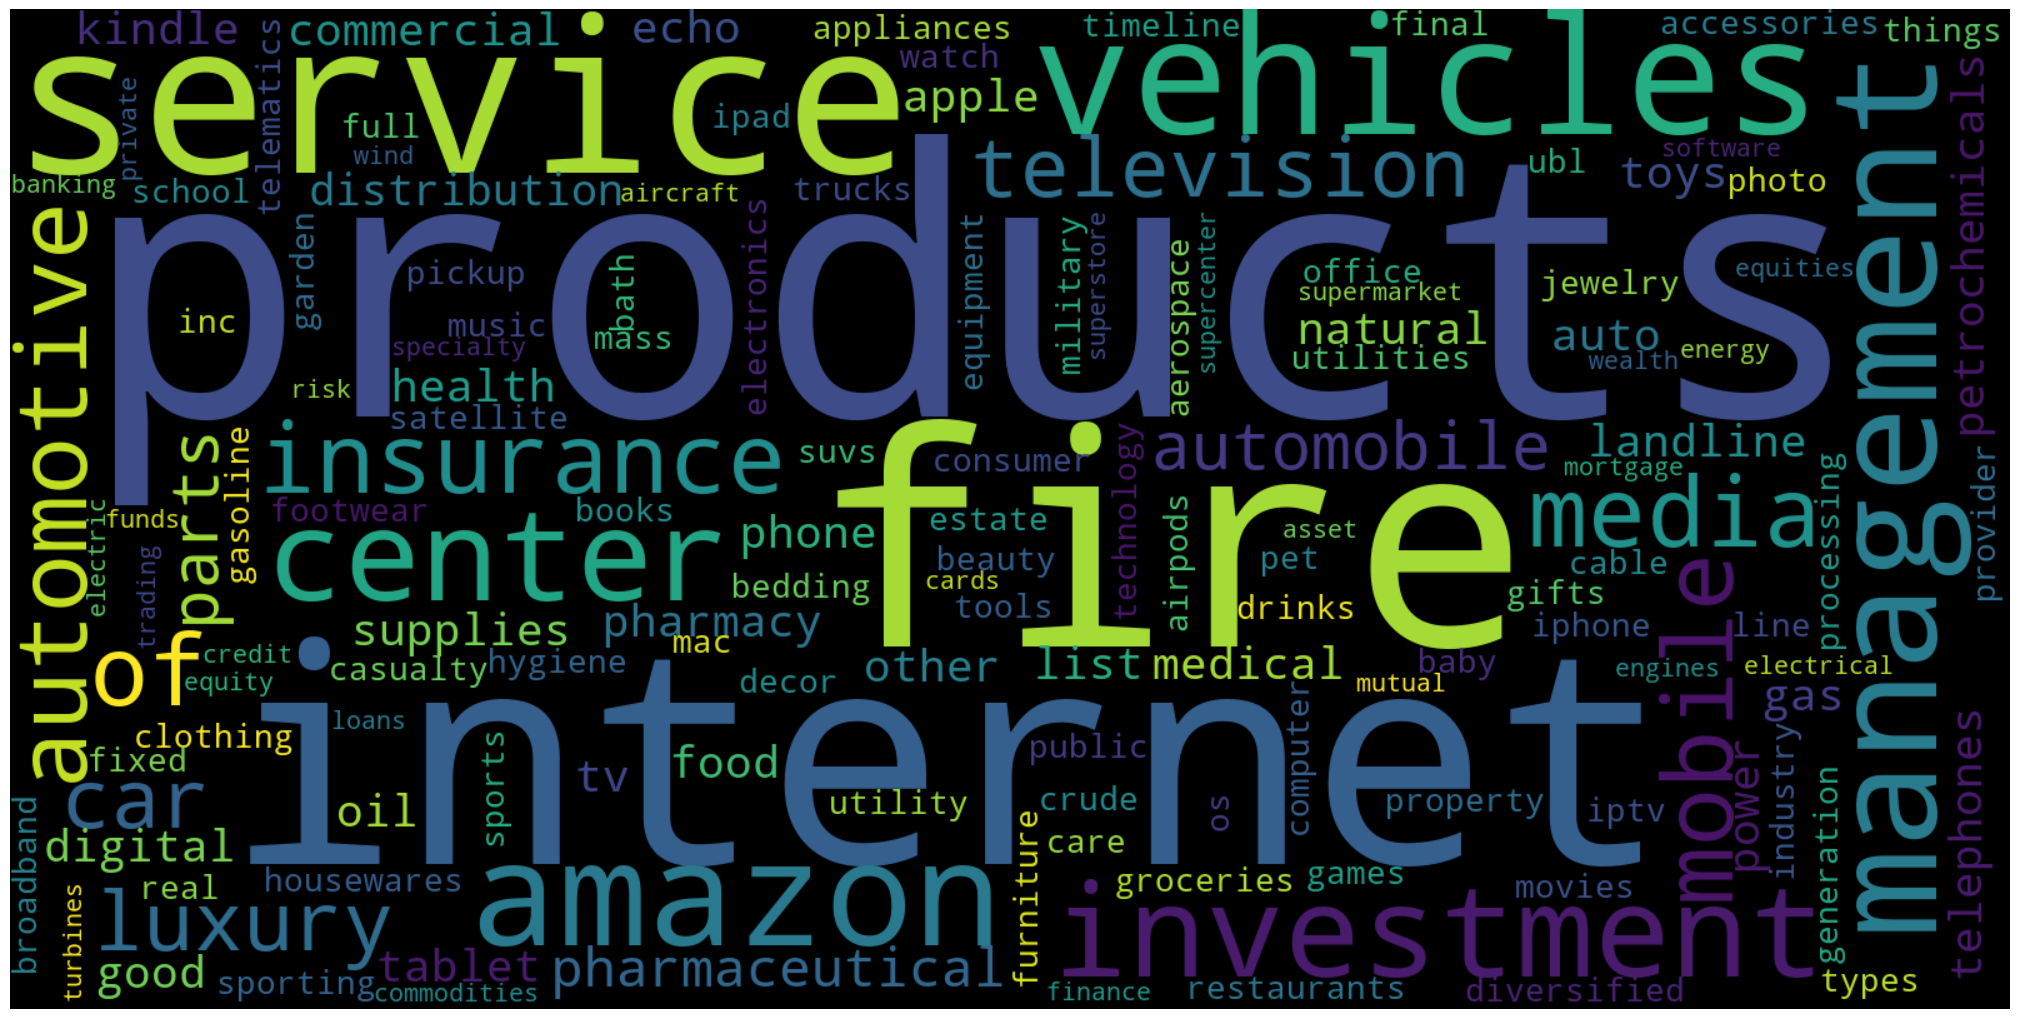

In [70]:
create_wordcloud(products)

In [71]:
industries = []
for i, x in enumerate(wiki_data):
    industry = x['industry'].lower() # get industries and lowercase
    # replace 'and' with '|' and ']]' with empty space 
    industry = industry.replace(' and ', '|').replace(']]', '')
    # extract all industries
    industry = regex.findall(industry)
    # strip trailing and leading spaces
    industry = [i.strip() for i in industry]
    # filter rogue words and de-duplicate
    industry = list(set([i for i in industry if i not in rogue_words]))
    # add to data
    data[i]['industry'] = ', '.join(industry)
    # add to list of industries
    industries.extend(industry)

print(industries)

['retail', 'energy', 'gas industry', 'gas', 'energy industry', 'oil', 'company', 'conglomerate', 'software services', 'online services', 'consumer electronics', 'managed healthcare', 'insurance', 'managed care', 'healthcare', 'shop', 'managed care', 'health insurance in the united states', 'health insurance', 'pharmacy', 'managed healthcare', 'company', 'conglomerate', 'telecommunications industry', 'technology', 'telecommunications', 'technology company', 'automotive industry', 'automotive', 'automotive industry', 'automotive', 'pharmaceutical', 'energy', 'ubl', 'gas', 'energy industry', 'petroleum industry', 'oil', 'healthcare', 'retail', 'telecommunications industry', 'telecommunications', 'mass media', 'retail', 'company', 'conglomerate', 'retail industry', 'pharmaceuticals', 'pharmaceutical industry', 'retail', 'financial services']


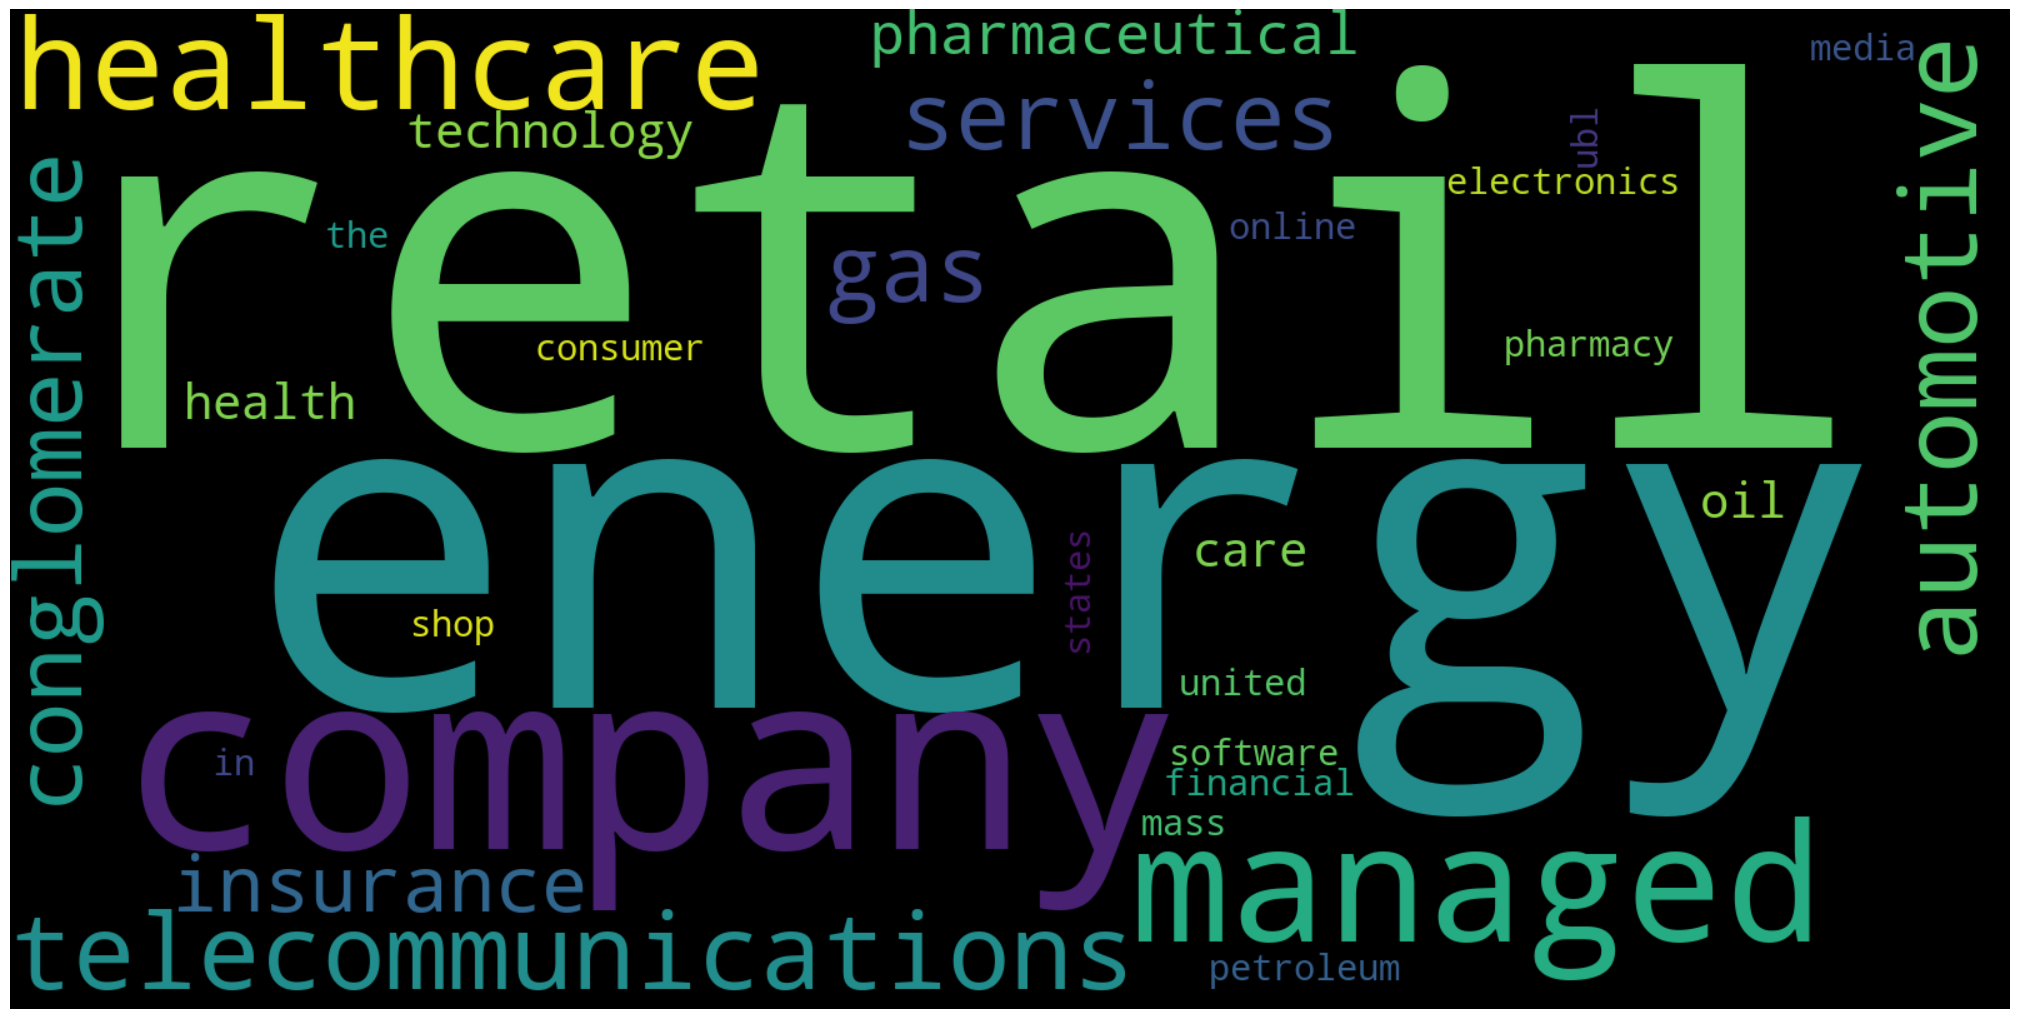

In [72]:
create_wordcloud(industries, ['industry']) # adding "industry" to the stopword list 

In [73]:
for i in range(0,len(wiki_data)):
    print(wiki_data[i]['assets'])

{{nowrap| |decrease| |US$|243.45 billion| (FY2023)|ref| name= N|}} {{decrease}} {{US$|243.45 billion}} (FY2023)
{{nowrap |Increase| US$369.07 billion (2022)|sfn|10-K|2022|}} {{Increase}} US$369.07 billion (2022) {{sfn|10-K|2022}}
{{decrease}} {{US$|948.4 billion}} (2022)
{{increase}} {{US$|352.76 billion}}
{{Increase}} {{US$|212.206 billion}} (2021)
{{decrease}} {{US$|63.30 billion}} (2022) {{rp|72}}
{{decrease}} {{US$|228.3 billion}}
{{increase}} US$462.68 billion (2022)
{{decrease}} {{US$|402.85}} billion
{{increase}} US$264.04 billion (2022)
{{decrease}} {{US$|255.9 billion}} (2022)
{{increase}} {{US$|57.34 billion}} (2021)
{{increase}} {{US$|257.7 billion}} (2022)
{{increase}} US$44.45 billion {{small|(2021)}}
{{increase}} $64.17 {{nbsp}} billion
{{increase}} {{US$|379.7 billion}}
{{increase}} {{US$|49.086 billion}} (2022)
{{nowrap|Decrease| US$187.8 billion|ref| name=sec10kge2023 |rp|45| (2022)}} {{Decrease}} US$187.8 billion {{rp|45}} (2022)
{{nowrap|increase| US$90.124&nbsp;bill

In [75]:
regex1 = re.compile('([\d\.]+)')

In [76]:
regex2 = re.compile('(billion|trillion)')

In [77]:
assets = []
for i, x in enumerate(wiki_data):
    y = x['assets'] # get assets
    z = regex1.findall(y)[0] # extract assets
    unit = regex2.findall(y)[0] # extract the unit
    asset = float(z) # convert to the numeric
    data[i]['assets'] = str(asset) + ' ' + unit # add to data
    # add to list of assets
    assets.append({'company' : x['company_name'], 'value' : asset, 'unit' : unit})

assets

[{'company': 'Walmart', 'value': 243.45, 'unit': 'billion'},
 {'company': 'ExxonMobil', 'value': 369.07, 'unit': 'billion'},
 {'company': 'Berkshire Hathaway', 'value': 948.4, 'unit': 'billion'},
 {'company': 'Apple Inc.', 'value': 352.76, 'unit': 'billion'},
 {'company': 'UnitedHealth Group', 'value': 212.206, 'unit': 'billion'},
 {'company': 'McKesson Corporation', 'value': 63.3, 'unit': 'billion'},
 {'company': 'CVS Health', 'value': 228.3, 'unit': 'billion'},
 {'company': 'Amazon (company)', 'value': 462.68, 'unit': 'billion'},
 {'company': 'AT&T', 'value': 402.85, 'unit': 'billion'},
 {'company': 'General Motors', 'value': 264.04, 'unit': 'billion'},
 {'company': 'Ford Motor Company', 'value': 255.9, 'unit': 'billion'},
 {'company': 'AmerisourceBergen', 'value': 57.34, 'unit': 'billion'},
 {'company': 'Chevron Corporation', 'value': 257.7, 'unit': 'billion'},
 {'company': 'Cardinal Health', 'value': 44.45, 'unit': 'billion'},
 {'company': 'Costco', 'value': 64.17, 'unit': 'billion

In [78]:
for i, asset in enumerate(assets):
    if asset['unit'] == 'trillion': # if unit is in trillion
        assets[i]['value'] = asset['value'] * 1000 # convert trillion to billion
        assets[i]['unit'] = 'billion'

In [79]:
df_assets = pd.DataFrame(assets)
df_assets

,company,value,unit
0,Walmart,243.450,billion
1,ExxonMobil,369.070,billion
2,Berkshire Hathaway,948.400,billion
3,Apple Inc.,352.760,billion
4,UnitedHealth Group,212.206,billion
5,McKesson Corporation,63.300,billion
6,CVS Health,228.300,billion
7,Amazon (company),462.680,billion
8,AT&T,402.850,billion
9,General Motors,264.040,billion


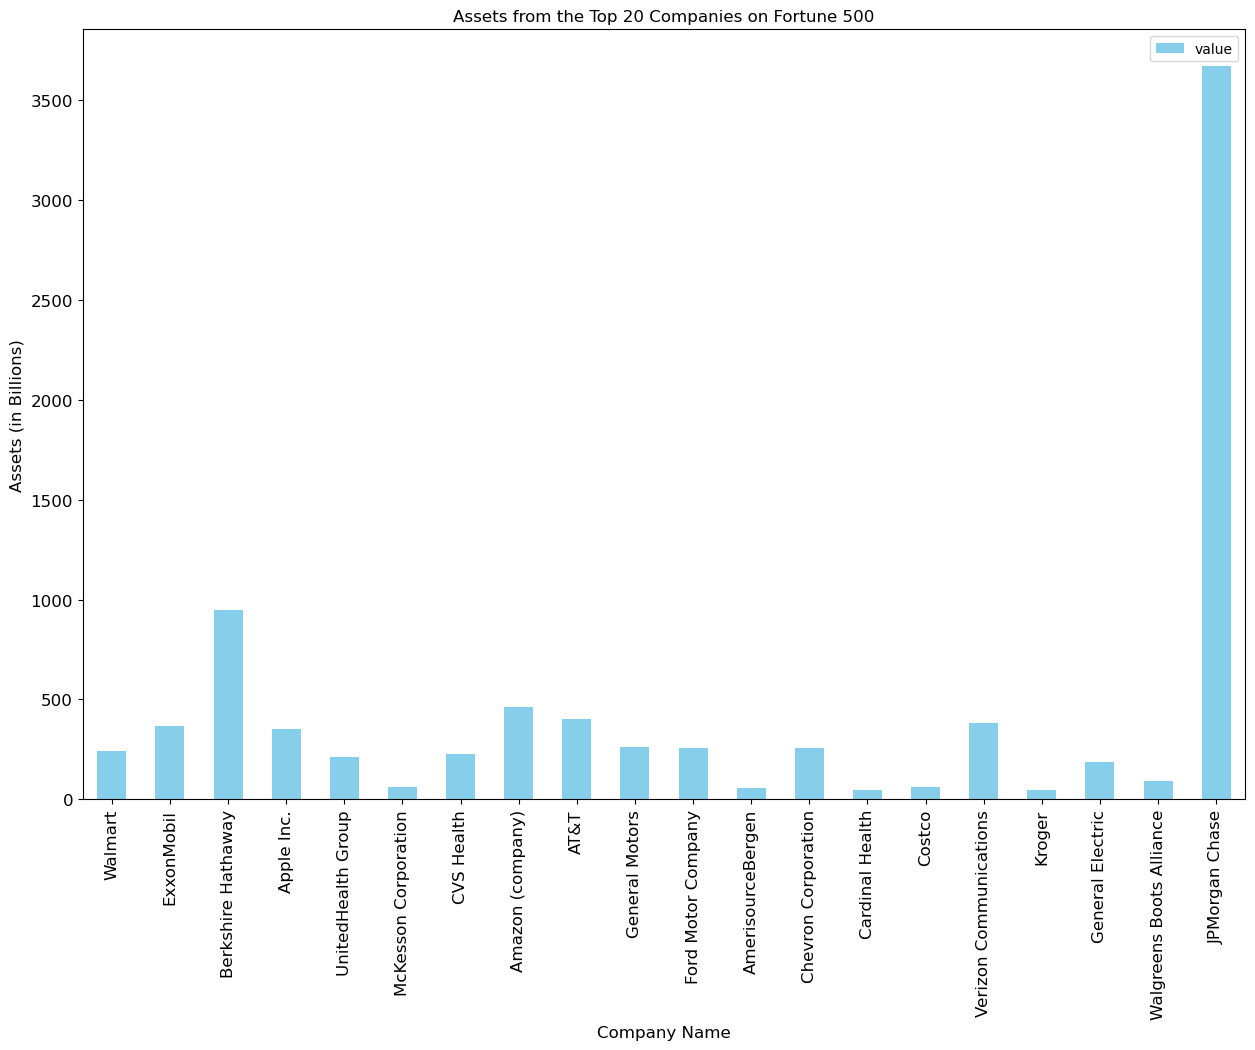

In [80]:
ax = df_assets.plot(kind='bar', 
               title ="Assets from the Top 20 Companies on Fortune 500",
               color='skyblue',
               figsize=(15, 10), 
               legend=True, 
               fontsize=12
              )

ax.set_xticklabels(df_assets.company)
ax.set_xlabel("Company Name", fontsize=12)
ax.set_ylabel("Assets (in Billions)", fontsize=12)
plt.show()

In [81]:
df_wiki = pd.DataFrame(data)
df_wiki.head()

,wiki_title,product,industry,assets
0,Walmart,"appliances, pet supplies, baby products, footw...",retail,243.45 billion
1,ExxonMobil,"petrochemicals, power generation, natural gas,...","energy, gas industry, gas, energy industry, oil",369.07 billion
2,Berkshire Hathaway,"aerospace, investment, property, food processi...","company, conglomerate",948.4 billion
3,Apple Inc.,"ipad, mac, apple watch, iphone, timeline of ap...","software services, online services, consumer e...",352.76 billion
4,UnitedHealth Group,,"managed healthcare, insurance, managed care",212.206 billion


In [83]:
df = pd.read_csv('C://Users//hantt3//Downloads//top 500 companies.csv', nrows=20) # reading only the first 20 rows
df = pd.concat([df, df_wiki], axis=1) # concatenating both the datasets
df

,Unnamed: 0,rank,company_name,url,wiki_title,product,industry,assets
0,0,1,Walmart,http://www.stock.walmart.com,Walmart,"appliances, pet supplies, baby products, footw...",retail,243.45 billion
1,1,2,Exxon Mobil,http://www.exxonmobil.com,ExxonMobil,"petrochemicals, power generation, natural gas,...","energy, gas industry, gas, energy industry, oil",369.07 billion
2,2,3,Berkshire Hathaway,http://www.berkshirehathaway.com,Berkshire Hathaway,"aerospace, investment, property, food processi...","company, conglomerate",948.4 billion
3,3,4,Apple,http://www.apple.com,Apple Inc.,"ipad, mac, apple watch, iphone, timeline of ap...","software services, online services, consumer e...",352.76 billion
4,4,5,UnitedHealth Group,http://www.unitedhealthgroup.com,UnitedHealth Group,,"managed healthcare, insurance, managed care",212.206 billion
5,5,6,McKesson,http://www.mckesson.com,McKesson Corporation,"medical technology, health care services, phar...",healthcare,63.3 billion
6,6,7,CVS Health,http://www.cvshealth.com,CVS Health,,"shop, managed care, health insurance in the un...",228.3 billion
7,7,8,Amazon.com,http://www.amazon.com,Amazon (company),"amazon fire tablet, amazon fire tv, kindle, fi...","company, conglomerate",462.68 billion
8,8,9,AT&T,http://www.att.com,AT&T,"internet services, fixed-line telephones, ubl,...","telecommunications industry, technology, telec...",402.85 billion
9,9,10,General Motors,http://www.gm.com,General Motors,"military vehicles, automobiles, luxury vehicle...","automotive industry, automotive",264.04 billion


In [84]:
df.drop(columns = ["Unnamed: 0", "wiki_title"], inplace = True)

In [85]:
df.to_csv('top_20_companies.csv', index=False)

In [86]:
data = pd.read_csv("top_20_companies.csv")

In [87]:
data.head()

,rank,company_name,url,product,industry,assets
0,1,Walmart,http://www.stock.walmart.com,"appliances, pet supplies, baby products, footw...",retail,243.45 billion
1,2,Exxon Mobil,http://www.exxonmobil.com,"petrochemicals, power generation, natural gas,...","energy, gas industry, gas, energy industry, oil",369.07 billion
2,3,Berkshire Hathaway,http://www.berkshirehathaway.com,"aerospace, investment, property, food processi...","company, conglomerate",948.4 billion
3,4,Apple,http://www.apple.com,"ipad, mac, apple watch, iphone, timeline of ap...","software services, online services, consumer e...",352.76 billion
4,5,UnitedHealth Group,http://www.unitedhealthgroup.com,NaN,"managed healthcare, insurance, managed care",212.206 billion
